In [1]:
!ls

out_HHall.root	 out_WWall.root		   plot_confusion_matrix.pyc
out_QCDall.root  out_ZZall.root		   test_ml_scikitlearn.ipy.ipynb
out_TTall.root	 plot_confusion_matrix.py


In [2]:
from ROOT import TFile

Welcome to JupyROOT 6.08/05


In [3]:
fileWW = TFile("out_WWall.root", "READ")
fileZZ = TFile("out_ZZall.root", "READ")
fileHH = TFile("out_HHall.root", "READ")
fileTT = TFile("out_TTall.root", "READ")
fileJJ = TFile("out_QCDall.root", "READ")

In [4]:
treeWW = fileWW.Get("jetTree")
treeZZ = fileZZ.Get("jetTree")
treeHH = fileHH.Get("jetTree")
treeTT = fileTT.Get("jetTree")
treeJJ = fileJJ.Get("jetTree")

In [5]:
vars = []
for branch in treeWW.GetListOfBranches():
    name = branch.GetName()
    if 'Njets' in name:
        continue
    if 'target' in name:
        continue
    if 'NNout' in name:
        continue
    if 'sum' in name:
        continue
    if 'gen' in name:
        continue
    if 'flatten' in name:
        continue
    if 'dist' in name:
        continue
    if 'npv' in name:
        continue
    if 'sorting' in name:
        continue
    if name == 'mass':
        continue
    if name == 'minDist':
        continue
    if 'et' in name:
        continue
    print name
    vars.append(name)

SDmass
tau32
tau21
h1_top
h2_top
h3_top
h4_top
isotropy_top
aplanarity_top
sphericity_top
thrust_top
h1_W
h2_W
h3_W
h4_W
isotropy_W
aplanarity_W
sphericity_W
thrust_W
h1_Z
h2_Z
h3_Z
h4_Z
isotropy_Z
aplanarity_Z
sphericity_Z
thrust_Z
h1_H
h2_H
h3_H
h4_H
isotropy_H
aplanarity_H
sphericity_H
thrust_H
bDisc
q
m12_W
m13_W
m23_W
m1234_W
m12_Z
m13_Z
m23_Z
m1234_Z
m12_top
m13_top
m23_top
m1234_top
m12_H
m13_H
m23_H
m1234_H
PzOverP_top
PzOverP_W
PzOverP_Z
PzOverP_H


In [6]:
from root_numpy import tree2array
import numpy as np
import matplotlib.pyplot as plt

In [30]:
vars[0:3]

['SDmass', 'tau32', 'tau21']

In [45]:
sel = "tau32 < 9999. && et > 500."
treeVars = vars
arrayWW = tree2array(treeWW, treeVars, sel)
arrayZZ = tree2array(treeZZ, treeVars, sel)
arrayHH = tree2array(treeHH, treeVars, sel)
arrayTT = tree2array(treeTT, treeVars, sel)
arrayJJ = tree2array(treeJJ, treeVars, sel)

In [46]:
newArrayWW = []
newArrayZZ = []
newArrayHH = []
newArrayTT = []
newArrayJJ = []
for entry in arrayWW[:]:
    a = list(entry)
    newArrayWW.append(a)
for entry in arrayZZ[:]:
    a = list(entry)
    newArrayZZ.append(a)
for entry in arrayHH[:]:
    a = list(entry)
    newArrayHH.append(a)
for entry in arrayTT[:]:
    a = list(entry)
    newArrayTT.append(a)
for entry in arrayJJ[:]:
    a = list(entry)
    newArrayJJ.append(a)   




In [47]:
arrayWW = newArrayWW
arrayZZ = newArrayZZ
arrayTT = newArrayTT
arrayHH = newArrayHH
arrayJJ = newArrayJJ


In [17]:
histsWW = np.array(arrayWW).T
histsZZ = np.array(arrayZZ).T
histsHH = np.array(arrayHH).T
histsTT = np.array(arrayTT).T
histsJJ = np.array(arrayJJ).T


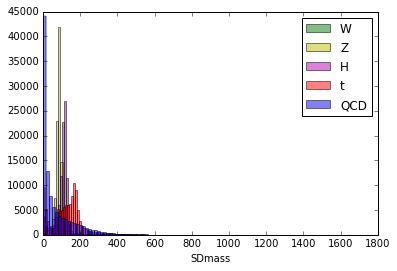

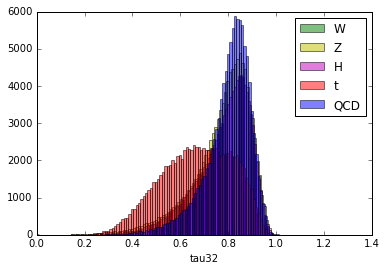

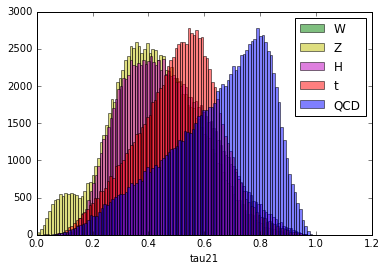

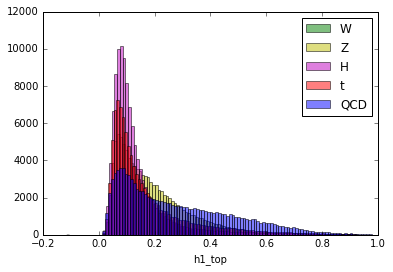

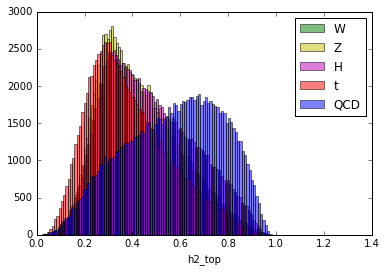

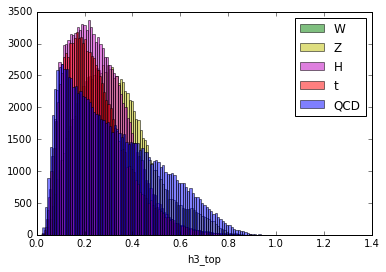

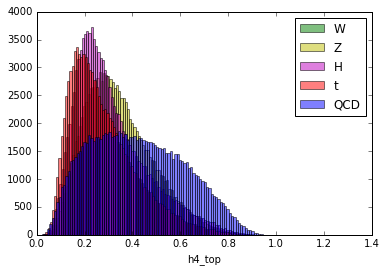

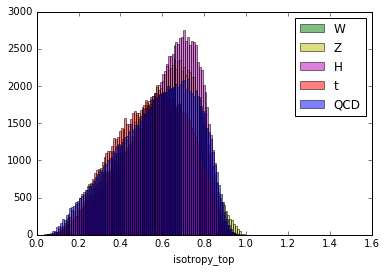

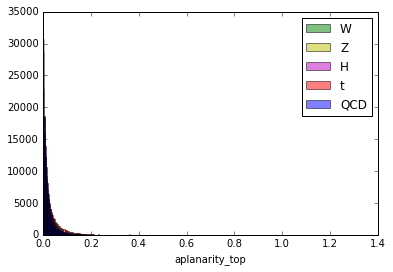

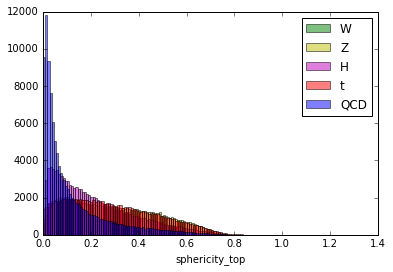

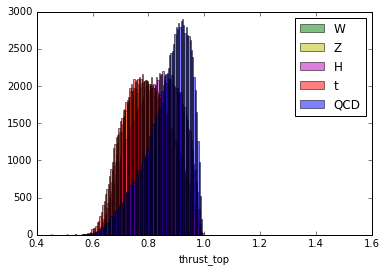

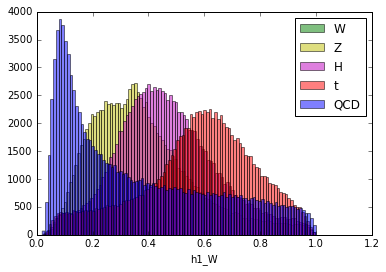

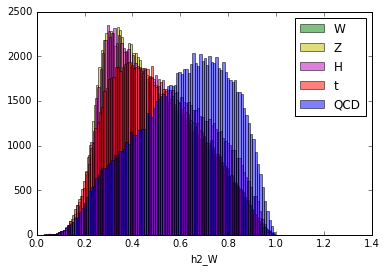

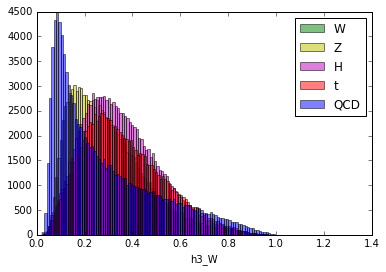

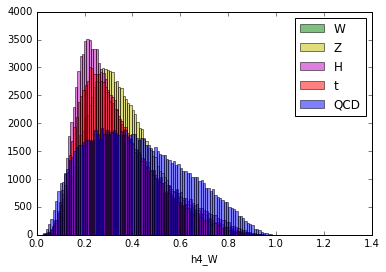

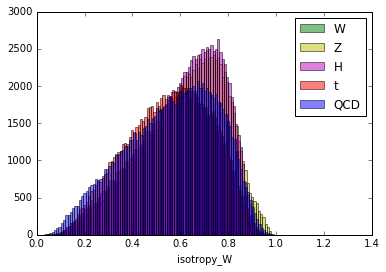

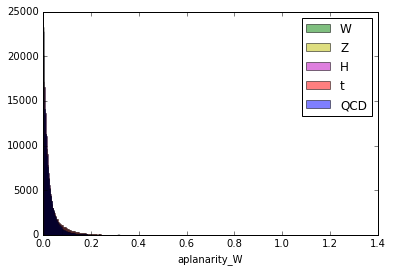

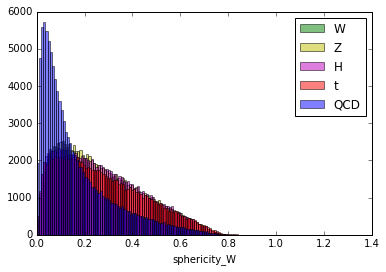

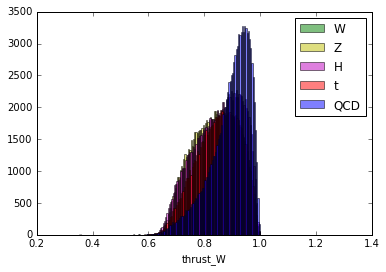

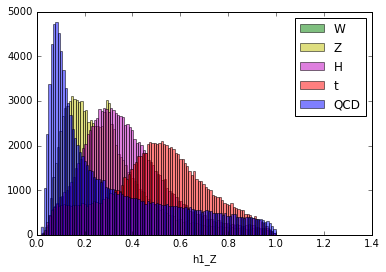

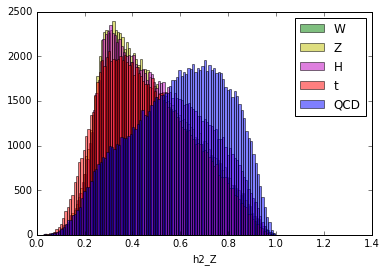

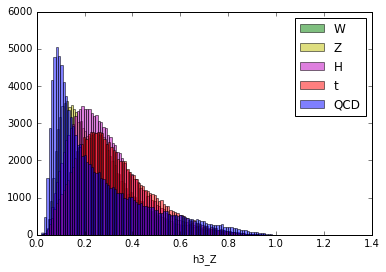

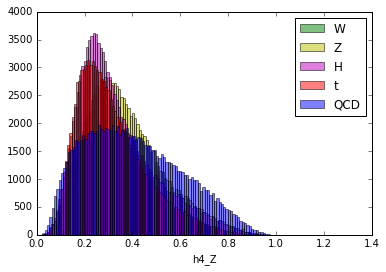

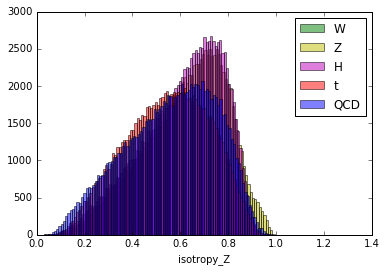

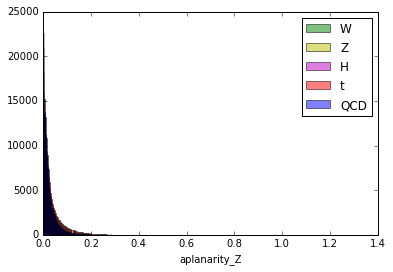

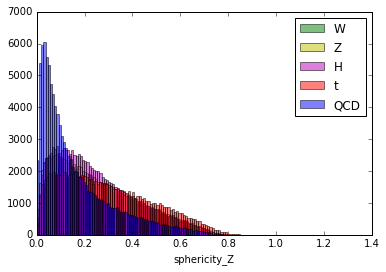

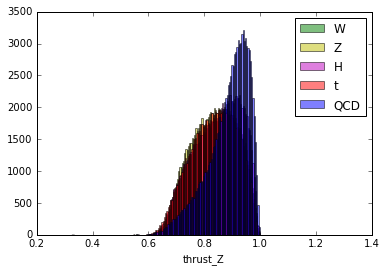

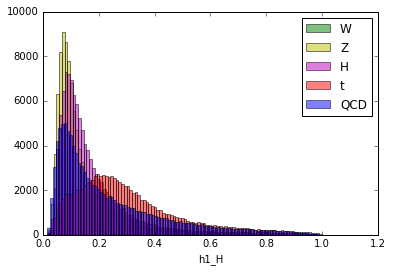

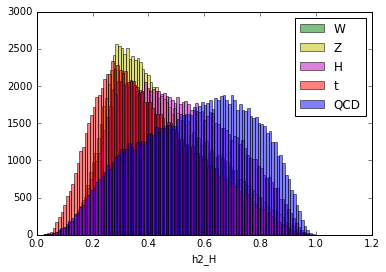

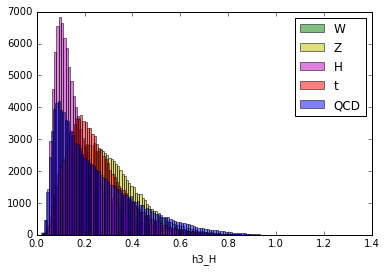

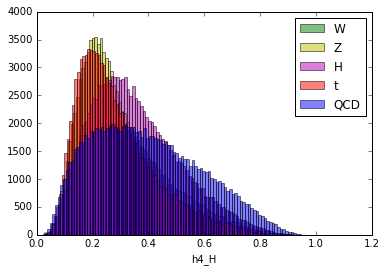

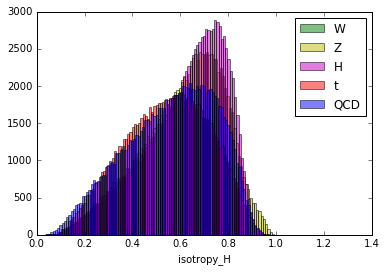

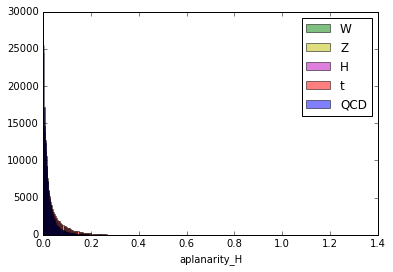

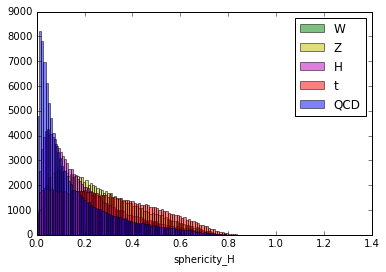

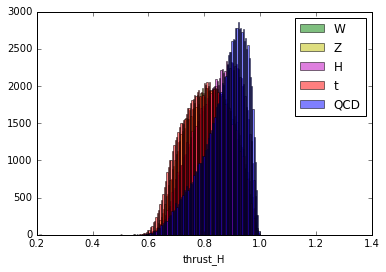

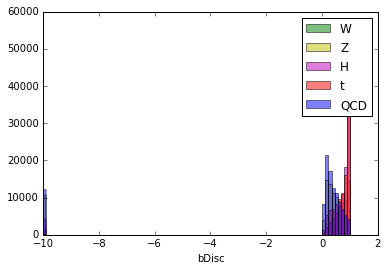

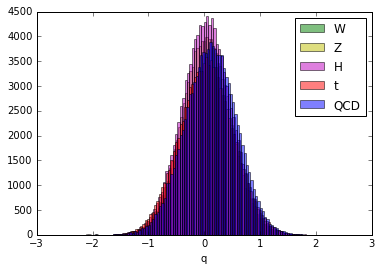

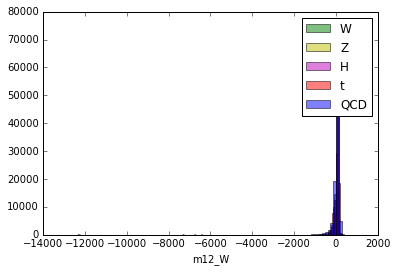

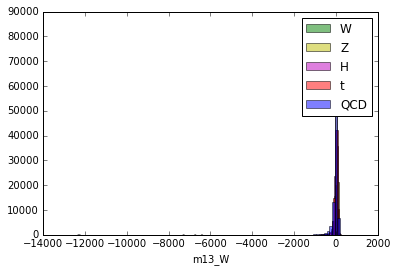

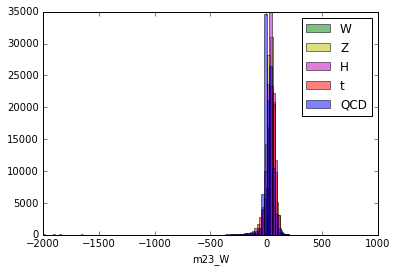

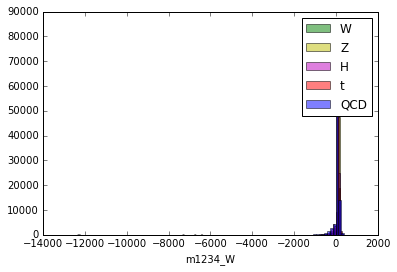

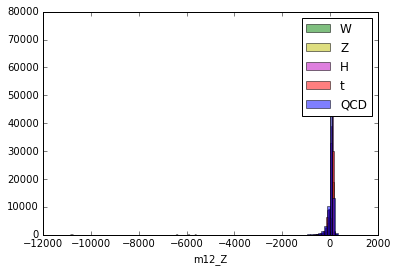

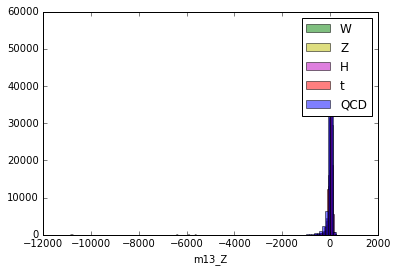

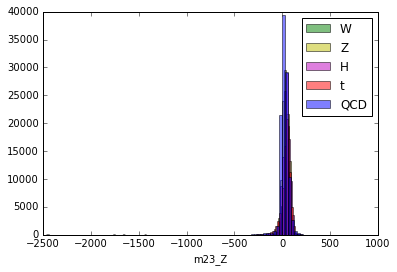

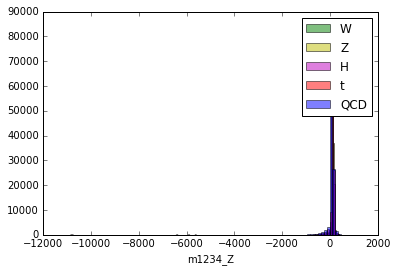

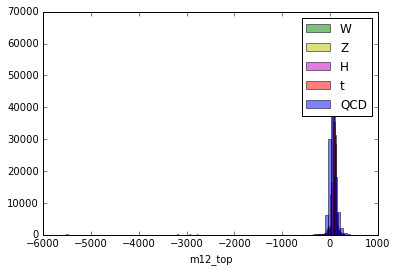

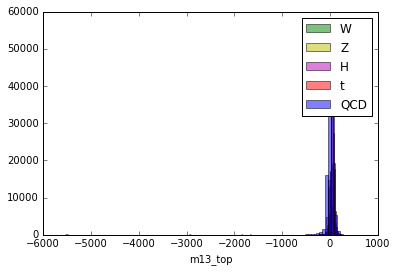

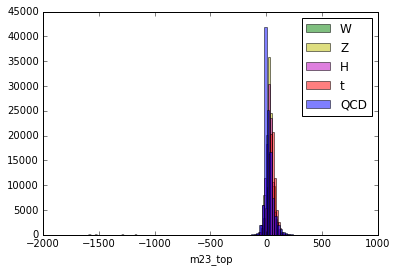

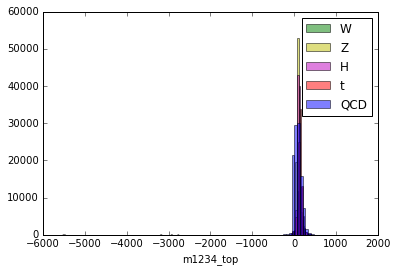

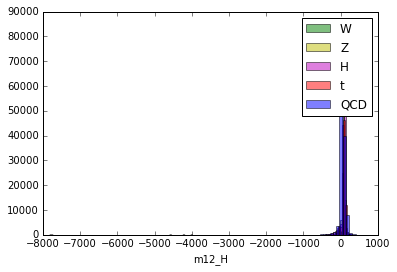

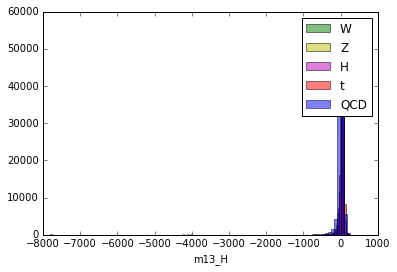

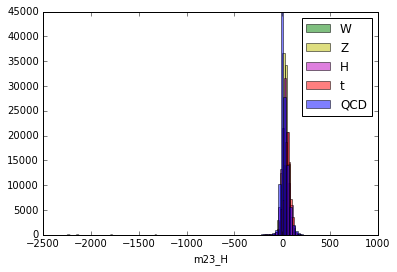

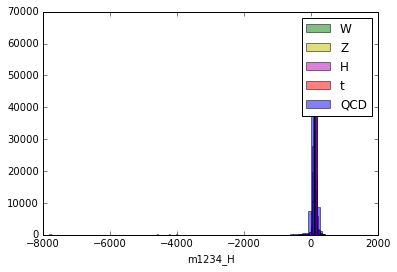

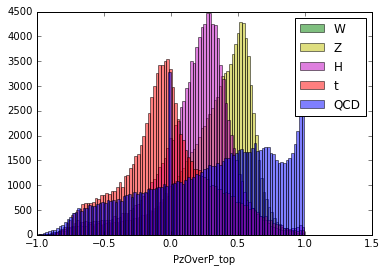

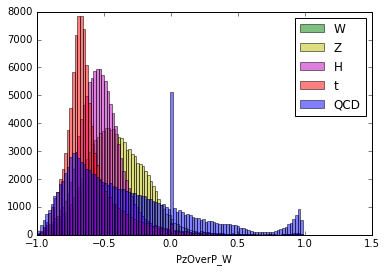

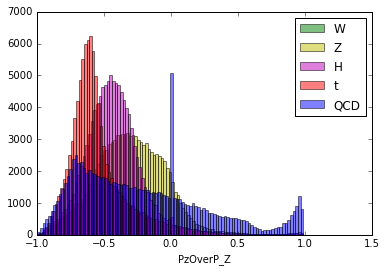

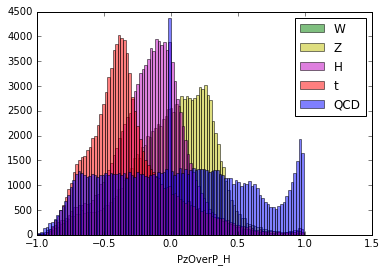

IndexError: index 57 is out of bounds for axis 0 with size 57

In [12]:
for index, hist in enumerate(histsWW[1]):
    plt.figure()
    plt.hist(hist, bins=100, alpha=0.5, color='g', label='W')
    plt.hist(histsZZ[index], bins=100, alpha=0.5, color='y', label='Z')
    plt.hist(histsHH[index], bins=100, alpha=0.5, color='m', label='H')
    plt.hist(histsTT[index], bins=100, alpha=0.5,color='r', label='t')
    plt.hist(histsJJ[index], bins=100, alpha=0.5,color='b', label='QCD')
    plt.xlabel(vars[index])
    plt.legend()
    plt.show()
    plt.close()

In [13]:
from sklearn import svm

In [48]:
#randomize dataset
import random

trainData = []
targetData = []
nEvents = len(arrayWW) + len(arrayZZ) + len(arrayHH) + len(arrayTT) + len(arrayJJ)
print nEvents
while nEvents > 0:
    rng = random.randint(0,4)
    if (rng == 0 and len(arrayJJ) > 0):
        trainData.append(arrayJJ.pop())
        targetData.append(0)
        nEvents = nEvents -1
    if (rng == 1 and len(arrayWW) > 0):
        trainData.append(arrayWW.pop())
        targetData.append(1)
        nEvents = nEvents - 1
    if (rng == 2 and len(arrayZZ) > 0):
        trainData.append(arrayZZ.pop())
        targetData.append(2)
        nEvents = nEvents - 1
    if (rng == 3 and len(arrayHH) > 0):
        trainData.append(arrayHH.pop())
        targetData.append(3)
        nEvents = nEvents - 1
    if (rng == 4 and len(arrayTT) > 0):
        trainData.append(arrayTT.pop())
        targetData.append(4)
        nEvents = nEvents - 1


    



534963


In [49]:
#standardize dataset
from sklearn import preprocessing
trainData = preprocessing.scale(trainData)
trainData

array([[ 0.5 ,  0.88, -0.85, ..., -0.94, -1.14, -1.62],
       [-1.17,  0.81,  1.24, ..., -0.71, -0.79, -1.  ],
       [-0.9 ,  0.99,  1.9 , ..., -0.9 , -0.92, -0.78],
       ..., 
       [ 0.27, -0.26,  0.26, ..., -0.33, -0.11, -0.27],
       [-0.42,  0.67,  1.1 , ...,  0.47,  0.52,  0.69],
       [ 0.27, -0.38, -0.18, ..., -0.77, -0.88, -0.99]])

In [53]:
clf = svm.SVC(verbose=True)
clf.fit(trainData[:100000], targetData[:100000])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

[LibSVM]...........*.....*
optimization finished, #iter = 16114
obj = -10670.999534, rho = -0.954478
nSV = 12466, nBSV = 11095
............*....*
optimization finished, #iter = 16698
obj = -10647.318136, rho = -0.900433
nSV = 12407, nBSV = 10953
...............*.....*
optimization finished, #iter = 20286
obj = -13632.390105, rho = -0.803492
nSV = 15815, nBSV = 14172
.................*.....*
optimization finished, #iter = 22498
obj = -13825.543326, rho = -0.681491
nSV = 15944, nBSV = 14081
...................*....*
optimization finished, #iter = 23367
obj = -24706.388921, rho = 0.750111
nSV = 26195, nBSV = 25293
...........*....*
optimization finished, #iter = 15086
obj = -11596.761834, rho = 1.017440
nSV = 13364, nBSV = 12477
.........*...*
optimization finished, #iter = 12201
obj = -8393.827347, rho = 1.046193
nSV = 9848, nBSV = 8995
................*....*.*
optimization finished, #iter = 20364
obj = -17010.768615, rho = 0.636256
nSV = 18962, nBSV = 17958
............*...*
optimizatio

In [21]:
from sklearn import metrics

In [54]:
cm = metrics.confusion_matrix(clf.predict(trainData[100000:]), targetData[100000:])

In [26]:
targetNames = ['j', 'W', 'Z', 'H', 't']

In [28]:
from plot_confusion_matrix import plot_confusion_matrix

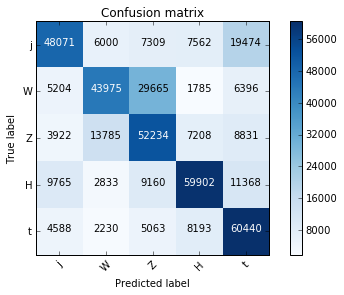

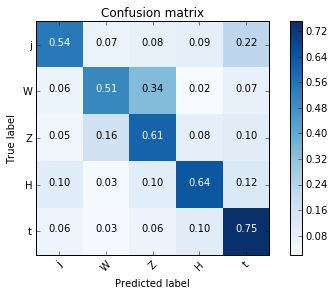

Confusion matrix, without normalization
[[48071  6000  7309  7562 19474]
 [ 5204 43975 29665  1785  6396]
 [ 3922 13785 52234  7208  8831]
 [ 9765  2833  9160 59902 11368]
 [ 4588  2230  5063  8193 60440]]
Normalized confusion matrix
[[ 0.54  0.07  0.08  0.09  0.22]
 [ 0.06  0.51  0.34  0.02  0.07]
 [ 0.05  0.16  0.61  0.08  0.1 ]
 [ 0.1   0.03  0.1   0.64  0.12]
 [ 0.06  0.03  0.06  0.1   0.75]]


In [55]:
plt.figure()
plot_confusion_matrix(cm.T, targetNames)
plt.figure()
plot_confusion_matrix(cm.T, targetNames, normalize=True)
plt.show()